In [13]:
# Import neccessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# read the dataset
df = pd.read_csv('/content/weather_2016_2020_daily.csv')

# Set the 'Date' column as the index
df.set_index("Date", inplace=True)

# view top 5 rows
df.head(5)

,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
Date,,,,,,,,,,,,,,,,,,
2016-01-06,1,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.00,2
2016-02-06,2,76,71.2,66,74,70.3,66,100,96.8,89,18,7.8,0,29.8,29.8,29.7,4.33,5
2016-03-06,3,79,72.1,68,72,70.0,68,100,93.6,72,18,4.7,0,29.8,29.8,29.7,3.18,6
2016-04-06,4,76,71.2,69,73,70.0,66,100,96.1,85,20,7.0,0,29.8,29.7,29.7,2.37,2
2016-05-06,5,82,73.8,68,72,70.0,68,100,88.7,62,17,7.7,0,29.7,29.7,29.7,0.39,4


In [9]:
# Check dataset structure
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1552 entries, 2016-01-06 to 2020-08-30
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Day          1552 non-null   int64  
 1   Temp_max     1552 non-null   int64  
 2   Temp_avg     1552 non-null   float64
 3   Temp_min     1552 non-null   int64  
 4   Dew_max      1552 non-null   int64  
 5   Dew_avg      1552 non-null   float64
 6   Dew_min      1552 non-null   int64  
 7   Hum_max      1552 non-null   int64  
 8   Hum_avg      1552 non-null   float64
 9   Hum_min      1552 non-null   int64  
 10  Wind_max     1552 non-null   int64  
 11  Wind_avg     1552 non-null   float64
 12  Wind_min     1552 non-null   int64  
 13  Press_max    1552 non-null   float64
 14  Press_avg    1552 non-null   float64
 15  Press_min    1552 non-null   float64
 16  Precipit     1552 non-null   float64
 17  day_of_week  1552 non-null   int64  
dtypes: float64(8), int64(10)

In [10]:
# Check first and last dates
print("\nFirst date in dataset:", df.index.min())
print("Last date in dataset:", df.index.max())


First date in dataset: 2016-01-06
Last date in dataset: 2020-12-08


In [11]:
# Check for missing values
missing_percent = df.isna().sum() / len(df) * 100
print("\nMissing Values (%):")
print(missing_percent)


Missing Values (%):
Day            0.0
Temp_max       0.0
Temp_avg       0.0
Temp_min       0.0
Dew_max        0.0
Dew_avg        0.0
Dew_min        0.0
Hum_max        0.0
Hum_avg        0.0
Hum_min        0.0
Wind_max       0.0
Wind_avg       0.0
Wind_min       0.0
Press_max      0.0
Press_avg      0.0
Press_min      0.0
Precipit       0.0
day_of_week    0.0
dtype: float64


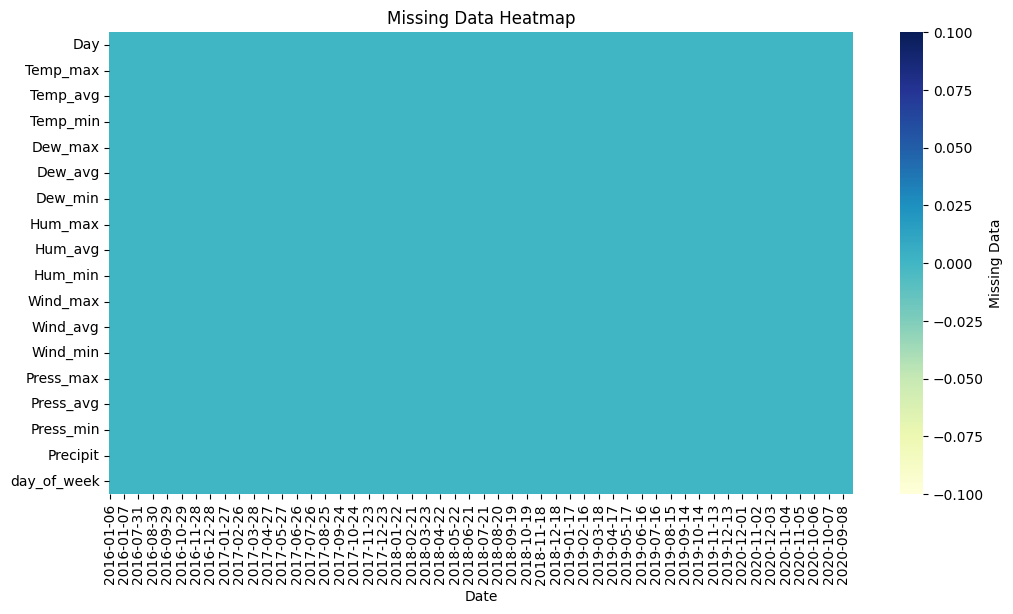

In [14]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isna().transpose(), cmap="YlGnBu", cbar_kws={"label": "Missing Data"})
plt.title("Missing Data Heatmap")
plt.show()

In [15]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
               Day     Temp_max     Temp_avg     Temp_min      Dew_max  \
count  1552.000000  1552.000000  1552.000000  1552.000000  1552.000000   
mean     15.726160    81.287371    71.752320    63.338273    66.615335   
std       8.800483    12.723409    12.490526    13.614699    12.279397   
min       1.000000    34.000000    27.600000     0.000000    18.000000   
25%       8.000000    74.000000    63.175000    52.750000    61.000000   
50%      16.000000    84.000000    74.300000    67.000000    70.000000   
75%      23.000000    92.000000    82.000000    75.000000    76.000000   
max      31.000000   101.000000    90.000000    83.000000    83.000000   

           Dew_avg      Dew_min      Hum_max      Hum_avg      Hum_min  \
count  1552.000000  1552.000000  1552.000000  1552.000000  1552.000000   
mean     62.147423    56.939433    92.566366    74.365786    51.204897   
std      13.626795    15.246868     7.658203    11.700804    15.601436   
min      13.

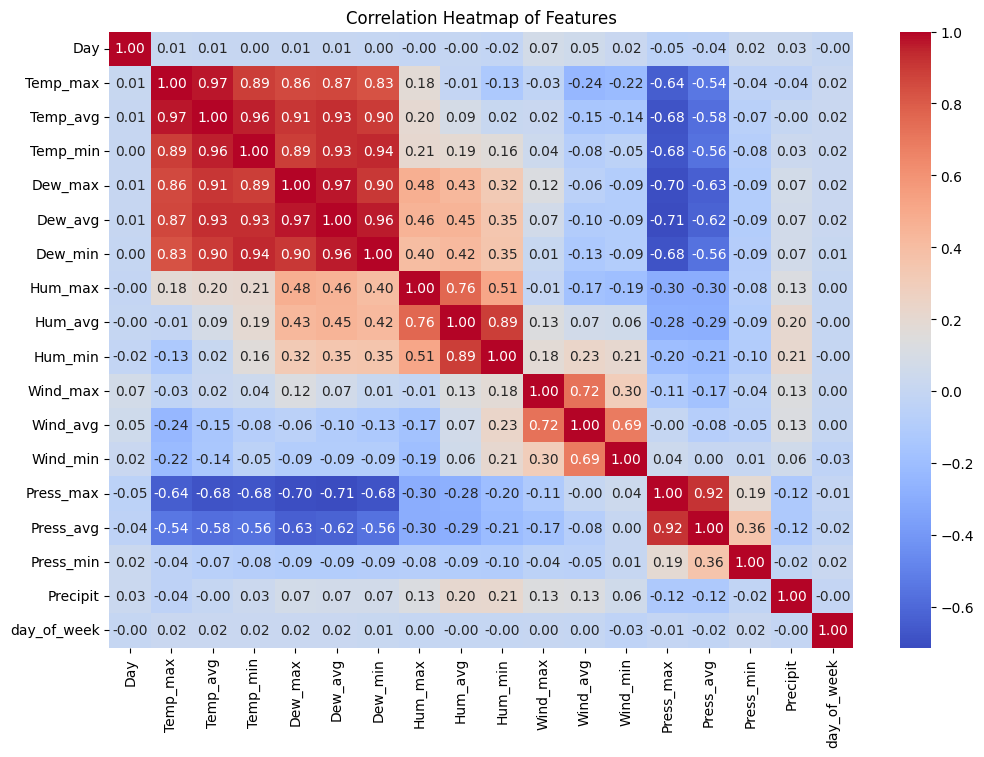

In [16]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()

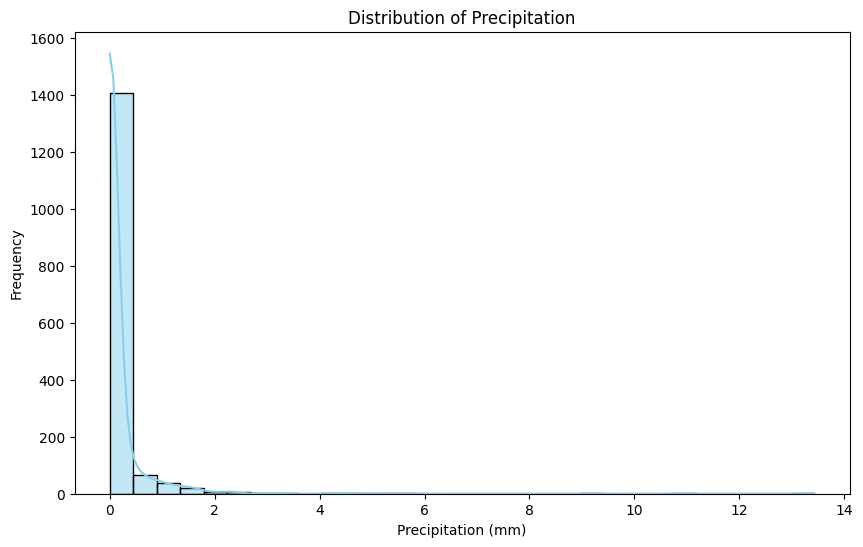

In [17]:
# Distribution Plot of Precipitation
plt.figure(figsize=(10, 6))
sns.histplot(df["Precipit"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Precipitation")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Frequency")
plt.show()

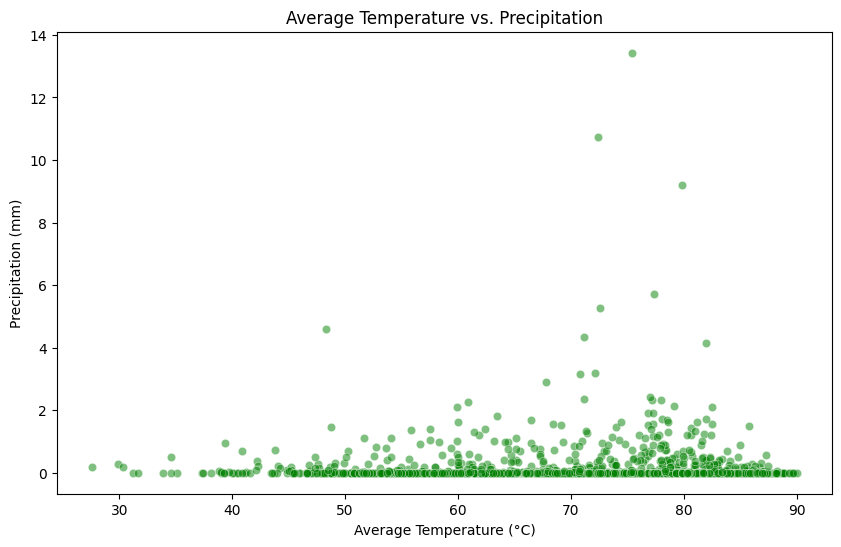

In [18]:
# Temperature vs Precipitation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Temp_avg"], y=df["Precipit"], alpha=0.5, color="green")
plt.title("Average Temperature vs. Precipitation")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Precipitation (mm)")
plt.show()